<a href="https://colab.research.google.com/github/Borwec/ida_25_26/blob/main/lab1/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
#https://www.kaggle.com/datasets/gorororororo23/plant-growth-data-classification

url = "https://drive.google.com/uc?id=1q96dh1Kdr8DI9nnLsDLntzvdurA2gOA3"
df = pd.read_csv(url)

In [3]:
df.shape

(193, 7)

In [4]:
df.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [5]:
df.isnull().sum()

,0
Soil_Type,0
Sunlight_Hours,0
Water_Frequency,0
Fertilizer_Type,0
Temperature,0
Humidity,0
Growth_Milestone,0


In [6]:
ohe_cols = ["Soil_Type", "Water_Frequency", "Fertilizer_Type"]
mms_cols = ["Sunlight_Hours", "Temperature", "Humidity"]

In [7]:
ohe = OneHotEncoder(sparse_output=False)
ohe_ft = ohe.fit_transform(df[ohe_cols])
ohe_df = pd.DataFrame(ohe_ft, columns=ohe.get_feature_names_out(ohe_cols))
df_intermediate = pd.concat([ohe_df, df.drop(columns=ohe_cols)], axis=1)
df_intermediate.head()

,Soil_Type_clay,Soil_Type_loam,Soil_Type_sandy,Water_Frequency_bi-weekly,Water_Frequency_daily,Water_Frequency_weekly,Fertilizer_Type_chemical,Fertilizer_Type_none,Fertilizer_Type_organic,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,5.192294,31.719602,61.591861,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.033133,28.919484,52.422276,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.892769,23.179059,44.660539,0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8.241144,18.465886,46.433227,0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,8.374043,18.128741,63.625923,0


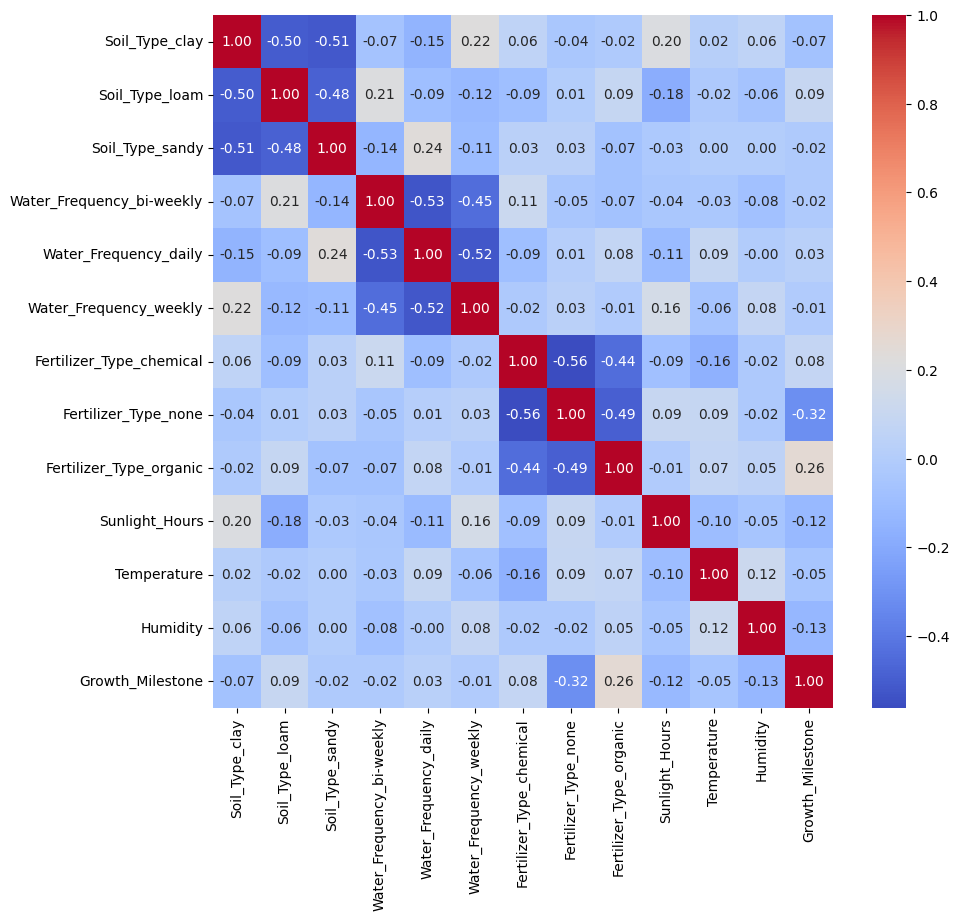

In [8]:
corr = df_intermediate.corr()
fig, ax = plt.subplots(figsize=(10, 9), dpi = 100)
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

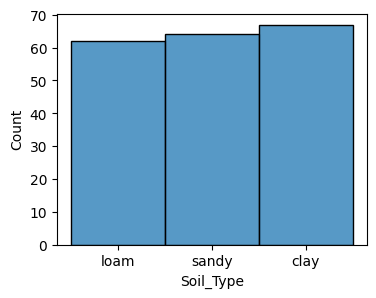

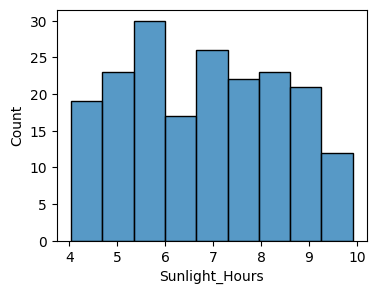

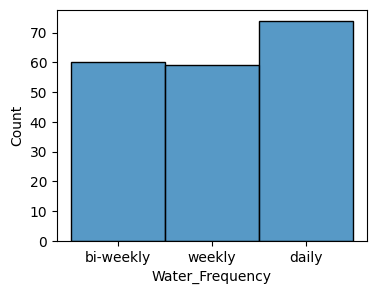

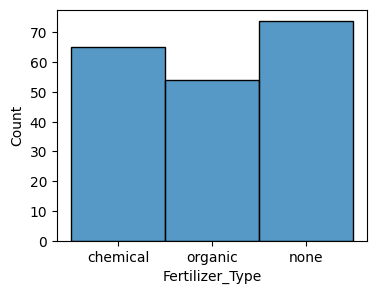

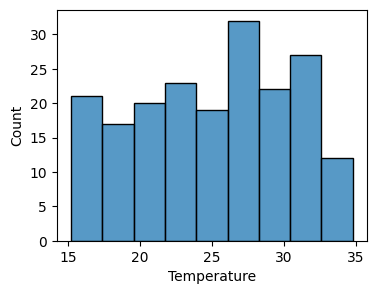

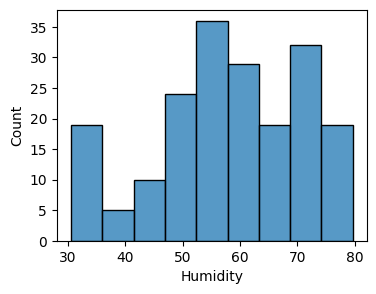

In [9]:
for i in df.drop(columns=["Growth_Milestone"]).columns.values:
    plt.figure(figsize=(4,3), dpi=100)
    sns.histplot(df[i])
    plt.show()

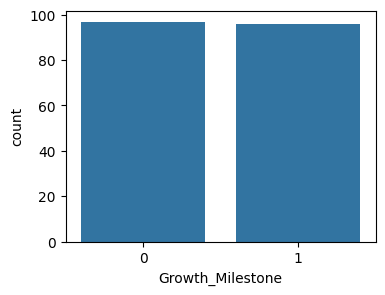

In [10]:
plt.figure(figsize=(4,3), dpi=100)
sns.countplot(x="Growth_Milestone", data=df)
plt.show()

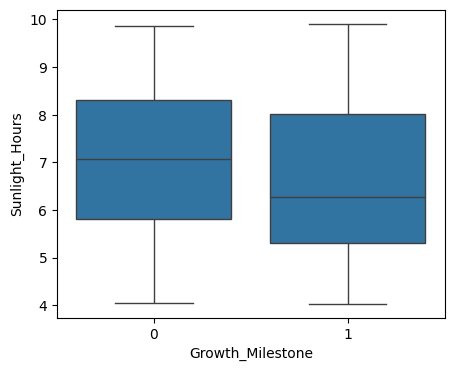

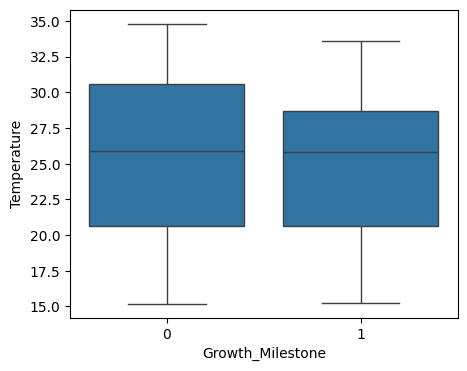

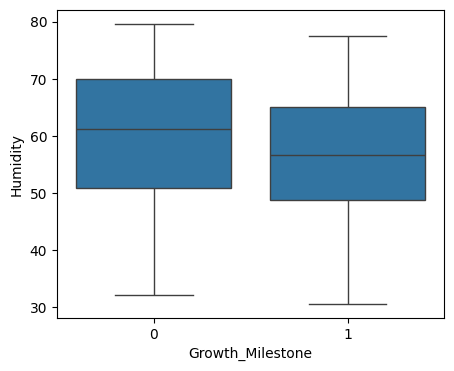

In [11]:
for i in range(len(mms_cols)):
    figure = plt.figure(figsize=(5, 4), dpi=100)
    ax = sns.boxplot(x="Growth_Milestone", y=mms_cols[i], data=df.drop(columns=ohe_cols))

In [12]:
X = df_intermediate.drop(columns=["Growth_Milestone"])
y = df_intermediate["Growth_Milestone"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 127)

In [13]:
mms = MinMaxScaler()
mms.fit(X_train)

mms_X_train = mms.transform(X_train)
mms_X_test = mms.transform(X_test)

In [14]:
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn.fit(mms_X_train, y_train)
pred = knn.predict(mms_X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51        26
           1       0.53      0.74      0.62        23

    accuracy                           0.57        49
   macro avg       0.59      0.58      0.56        49
weighted avg       0.59      0.57      0.56        49


[[11 15]
 [ 6 17]]

0.5714285714285714


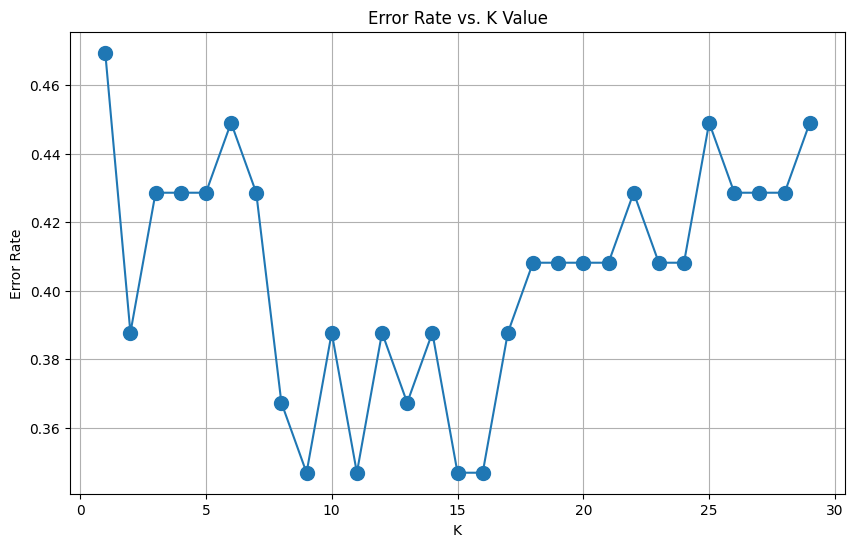

In [15]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(mms_X_train,y_train)
    pred_i = knn.predict(mms_X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6), dpi=100)
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [16]:
knn = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
knn.fit(mms_X_train, y_train)
pred = knn.predict(mms_X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64        26
           1       0.61      0.74      0.67        23

    accuracy                           0.65        49
   macro avg       0.66      0.66      0.65        49
weighted avg       0.66      0.65      0.65        49


[[15 11]
 [ 6 17]]

0.6530612244897959


In [17]:
svm = SVC(C=1, gamma=1)
svm.fit(mms_X_train, y_train)
pred = svm.predict(mms_X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.42      0.54        26
           1       0.56      0.83      0.67        23

    accuracy                           0.61        49
   macro avg       0.65      0.62      0.60        49
weighted avg       0.65      0.61      0.60        49


[[11 15]
 [ 4 19]]

0.6122448979591837


In [18]:
params = {"C": [10 ** x for x in range(-5, 6)], "gamma": [10 ** -x for x in range(0, 6)]}
grid = GridSearchCV(SVC(), params, cv=5, n_jobs=-1)

grid.fit(mms_X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [19]:
pred = grid.predict(mms_X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.62      0.71        26
           1       0.67      0.87      0.75        23

    accuracy                           0.73        49
   macro avg       0.75      0.74      0.73        49
weighted avg       0.76      0.73      0.73        49


[[16 10]
 [ 3 20]]

0.7346938775510204


In [20]:
dt = DecisionTreeClassifier(random_state = 127)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.64      0.69      0.67        26
           1       0.62      0.57      0.59        23

    accuracy                           0.63        49
   macro avg       0.63      0.63      0.63        49
weighted avg       0.63      0.63      0.63        49


[[18  8]
 [10 13]]

0.6326530612244898


In [21]:
rf = RandomForestClassifier(random_state = 127, n_jobs=-1)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.62      0.65        26
           1       0.62      0.70      0.65        23

    accuracy                           0.65        49
   macro avg       0.66      0.66      0.65        49
weighted avg       0.66      0.65      0.65        49


[[16 10]
 [ 7 16]]

0.6530612244897959


In [22]:
ab = AdaBoostClassifier(random_state = 127)
ab.fit(X_train, y_train)
pred = ab.predict(X_test)

print(classification_report(y_test,pred))
print()
print(confusion_matrix(y_test,pred))
print()
print(accuracy_score(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.64      0.70      0.67        23

    accuracy                           0.67        49
   macro avg       0.67      0.67      0.67        49
weighted avg       0.68      0.67      0.67        49


[[17  9]
 [ 7 16]]

0.673469387755102
